In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd

In [162]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [163]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine,inspect


In [168]:
# Create an engine to a SQLite database file called `hawaii.sqlite`
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [169]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [170]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [171]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [161]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [172]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Total Number of Measurmentts
TotalCountMeasurement = session.execute("SELECT count(*) FROM Measurement").fetchall()
print(TotalCountMeasurement)

[(19550,)]


In [173]:
#Get column names Measurement
Inspect = inspect(engine)
columns_measurement = Inspect.get_columns('measurement')
for cols in columns_measurement:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [174]:
#Total Number of Stations
TotalCountStation = session.execute("SELECT count(*) FROM Station").fetchall()
print(TotalCountStation)

[(9,)]


In [175]:
#Get column names for Station
columns_measurement = Inspect.get_columns('station')
for cols in columns_measurement:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [47]:
# Calculate the date 1 year ago from the last data point in the database
#Get the latest date
Last_date = session.execute("SELECT MAX(date) FROM Measurement").fetchall()

#Last_date is a List of Strings 
date_str2 = str(Last_date)

#Clean out all the extra symbols out of the the string

import re
date_str_clean = re.sub('\|\[|\,|\)|\(|\/|\[|\]', '', date_str2)


In [48]:
#Convert the last date on the list to a datetime
Last_date3 = dt.datetime.strptime(date_str_clean, "'%Y-%m-%d'").date() 
Last_date3

datetime.date(2017, 8, 23)

In [49]:
#Calc Start date of 12 month

import datetime 
from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta

start_date = Last_date3 + relativedelta(years=-1)
print(start_date)


2016-08-23


In [50]:
# Perform a query to retrieve the data and precipitation scores
perecip_scores = session.query(Measurement.date,Measurement.prcp)\
                          .filter(Measurement.date <= Last_date3)\
                          .filter(Measurement.date >= start_date)\
                          .order_by(Measurement.date.desc()).all()
perecip_scores

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [51]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Convert into dataframe
perecip_scores_df = pd.DataFrame(perecip_scores)

#Convert date column from Object Type to Date Type
perecip_scores_date = pd.to_datetime(perecip_scores_df.date)

#Create new DF with the Date and Prcp
perecip_scores_df2 = pd.DataFrame({'Date': perecip_scores_date,
                     'Precipitation': perecip_scores_df.prcp})
perecip_scores_df2.head()

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [52]:
# Sort the dataframe by date
perecip_scores_cleaned = perecip_scores_df2.sort_values(by='Date', ascending=True)

#Reindex
perecip_scores_cleaned2 = perecip_scores_cleaned.reset_index(drop=True)
perecip_scores_cleaned2.head()

,Date,Precipitation
0,2016-08-23,0.70
1,2016-08-23,0.00
2,2016-08-23,0.15
3,2016-08-23,1.79
4,2016-08-23,NaN


<Figure size 1080x1080 with 0 Axes>

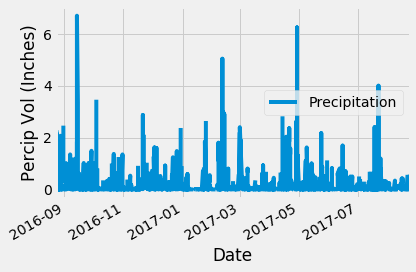

<Figure size 432x288 with 0 Axes>

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
#perecip_scores_cleaned2.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {start_date} till {Last_date3}')
fig1 = plt.figure(figsize=(15,15))
perecip_scores_cleaned2.plot('Date', 'Precipitation')
plt.grid(True)
plt.ylabel("Percip Vol (Inches)")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("Images/Precipitation.png")
plt.close(fig1)


![precipitation](Images/precipitation.png)

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
perecip_scores_cleaned2.Precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

![describe](Images/describe.png)

In [55]:
# Design a query to show how many stations are available in this dataset?

#Get station count
TotalCountStation = session.execute("SELECT count(*) FROM Station").fetchall()
TotalCountStation2 = str(TotalCountStation)

#Clean up station couunt
import re
TotalCountStation_Clean = re.sub('\|\[|\,|\)|\(|\/|\[|\]', '', TotalCountStation2)

print("There are {} stations available.".format(TotalCountStation_Clean))

There are 9 stations available.


In [56]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#View measurement dataset
#Use `engine.execute` to select and display the first 5 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

#Pandas group by to get meausrments
station_count = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                order_by(func.count(Measurement.tobs).desc()).all()

print("The most active station is {}.".format(station_count[0][0]))    


The most active station is USC00519281.


In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#temp query
# pop_station_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
#     filter(Measurement.station == station_count[0][0]).\
#     order_by(Measurement.date).all()

# pop_station_temps_df = pd.DataFrame(pop_station_temp)
# pop_station_maxid = pop_station_temps_df.tobs.idxmax()
# pop_station_minid = pop_station_temps_df.tobs.idxmin()
# print("The highest tobs value is in index {}.".format(pop_station_maxid))    
# print("The lowest tobs value is in index {}.".format(pop_station_minid))    

pop_station_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == station_count[0][0]).all()


pop_station_temp

[(54.0, 85.0, 71.66378066378067)]

In [62]:
print(f"The most active station has the following temperature records: Low: {pop_station_temp[0][0]} High: {pop_station_temp[0][1]} Average: {round(pop_station_temp[0][2], 1)}")

The most active station has the following temperature records: Low: 54.0 High: 85.0 Average: 71.7


In [67]:
# Choose the station with the highest number of temperature observations.
temp_obs_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
temp_obs_station

('USC00519281', 2772)

In [75]:
print("The station with the most temperature records is {}.".format(temp_obs_station[0]))

The station with the most temperature records is USC00519281.


In [95]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs_data = session.query(Measurement.tobs).filter(Measurement.date >= start_date).filter(Measurement.station == temp_obs_station[0]).all()
temp_obs_data_df = pd.DataFrame(temp_obs_data)
temp_obs_data_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


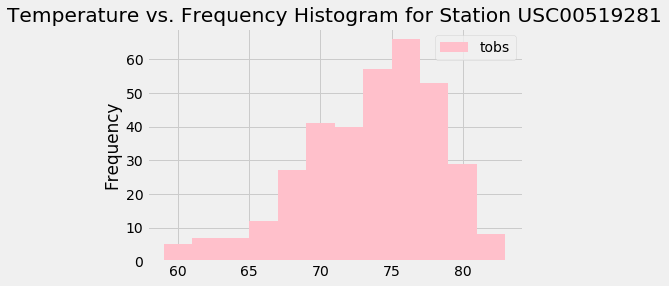

<Figure size 1080x1080 with 0 Axes>

In [99]:
temp_obs_data_df.plot.hist(bins=12, color = "pink",title="Temperature vs. Frequency Histogram for Station USC00519281")
plt.figure(figsize=(15,15))
plt.savefig("Images/TemperaturevsFrequency.png")
plt.show()

![precipitation](Images/station-histogram.png)

In [74]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [116]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
calc_temp2 = calc_temps(start_date, Last_date3)
#print(calc_temps(start_date, Last_date3))
calc_temp2


[(58.0, 74.59058295964125, 87.0)]

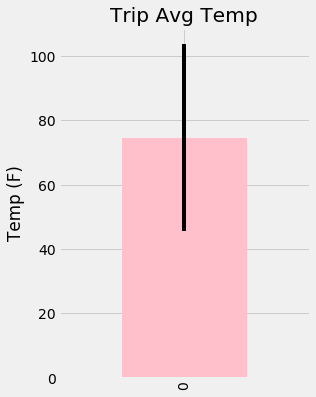

In [134]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

calc_temp_df = pd.DataFrame(calc_temp2, columns=['tmin','tavg','tmax'])
y_err = calc_temp_df.tmax - calc_temp_df.tmin
calc_temp_df.tavg.plot.bar(title='Trip Avg Temp', yerr= y_err ,  color='pink', figsize=(4,6))
plt.ylabel("Temp (F)")
plt.savefig("Images/TripAvgTemp.png")
plt.show()



In [180]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
Total_rain = session.query(Measurement.station, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.tobs)).group_by(Measurement.station).order_by(func.sum(Measurement.tobs).desc()).all()
Total_rain_df = pd.DataFrame(Total_rain, columns=['Station','Lat','Long', 'Elevation','Annual Rainfall'])
Total_rain_df

,Station,Lat,Long,Elevation,Annual Rainfall
0,USC00519397,21.2716,-157.8168,3.0,1827747.0
1,USC00519523,21.2716,-157.8168,3.0,1790613.0
2,USC00519281,21.2716,-157.8168,3.0,1787868.0
3,USC00513117,21.2716,-157.8168,3.0,1772235.0
4,USC00516128,21.2716,-157.8168,3.0,1667070.0
5,USC00514830,21.2716,-157.8168,3.0,1483839.0
6,USC00511918,21.2716,-157.8168,3.0,1275552.0
7,USC00517948,21.2716,-157.8168,3.0,922203.0
8,USC00518838,21.2716,-157.8168,3.0,334458.0


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
